<a href="https://colab.research.google.com/github/LatiefDataVisionary/data-science-application-college-task/blob/main/src/RandomForestClassifier_Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Impor Pustaka (Library Import)**

In [1]:
# Manipulasi dan Analisis Data
import pandas as pd
import numpy as np

# Visualisasi Data
import seaborn as sns
import matplotlib.pyplot as plt

# Pemuatan Dataset dari Kaggle
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Pemodelan dan Evaluasi
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           classification_report, confusion_matrix, ConfusionMatrixDisplay,
                           roc_auc_score, roc_curve)

# Visualisasi Decision Tree
from sklearn.tree import export_graphviz
import graphviz

## **2. Load data dan Exploratory Data Analysis (EDA)**

Pada tahap ini, kita akan memuat dataset dan melakukan beberapa langkah eksplorasi data awal untuk memahami karakteristik data yang kita miliki.

### **2.1 Memuat Dataset**

Dataset diunduh langsung dari Kaggle Hub menggunakan pustaka kagglehub.


In [2]:
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/red-wine-quality-cortez-et-al-2009",
  "winequality-red.csv"
)

display(df.head())

<ipython-input-2-92150c9e3da5>:1: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### **2.2 Pemeriksaan Awal Data**

Kita akan melihat informasi dasar dari dataset seperti tipe data setiap kolom, jumlah entri, dan ringkasan statistiknya.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
display(df.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### **2.3 Data Cleaning: Duplikat dan Missing Value**

In [5]:
# Memeriksa data duplikat
print(f'Jumlah data duplikat :  {df.duplicated().sum()}')
print(f'Jumlah baris sebelum menghapus duplikat: {len(df)}')

# Menghapus data dupliksa
df.drop_duplicates(inplace=True)

# Memverifikasi setelah penanganan
print(f'Jumlah baris setelah menghapus duplikat : {len(df)}')

Jumlah data duplikat :  240
Jumlah baris sebelum menghapus duplikat: 1599
Jumlah baris setelah menghapus duplikat : 1359


In [6]:
# Memeriksa nilai yang hilang (missing values)
df.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Hasil di atas menunjukkan bahwa data sudah bersih dari nilai yang hilang.

### **2.4 Visualisasi Distribusi Fitur**


Visualisasi Distribusi Setiap Fitur:


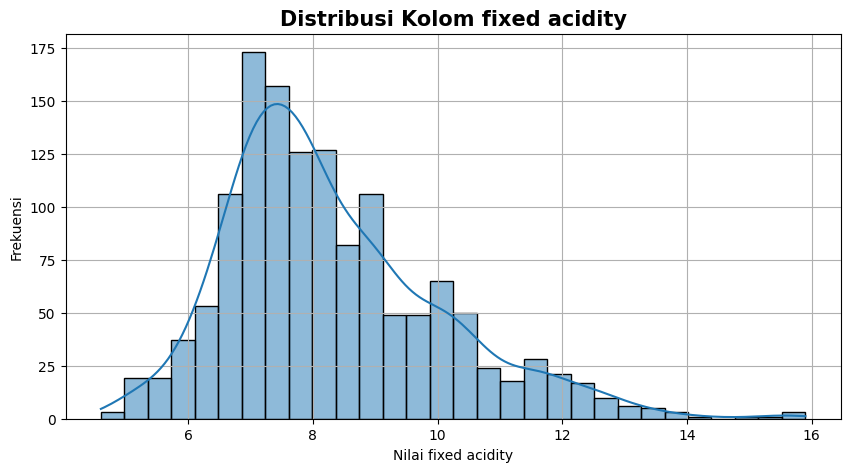

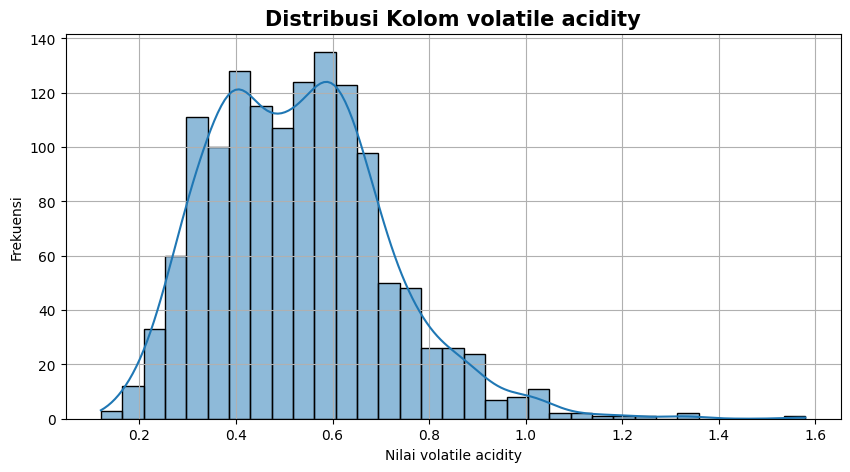

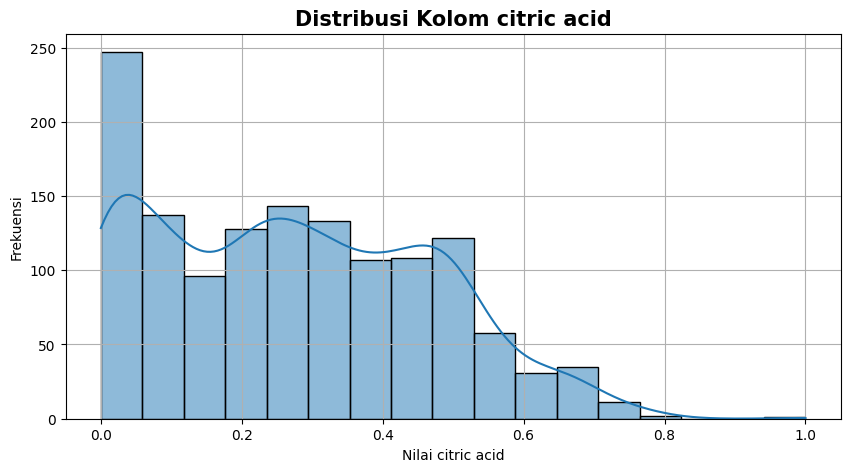

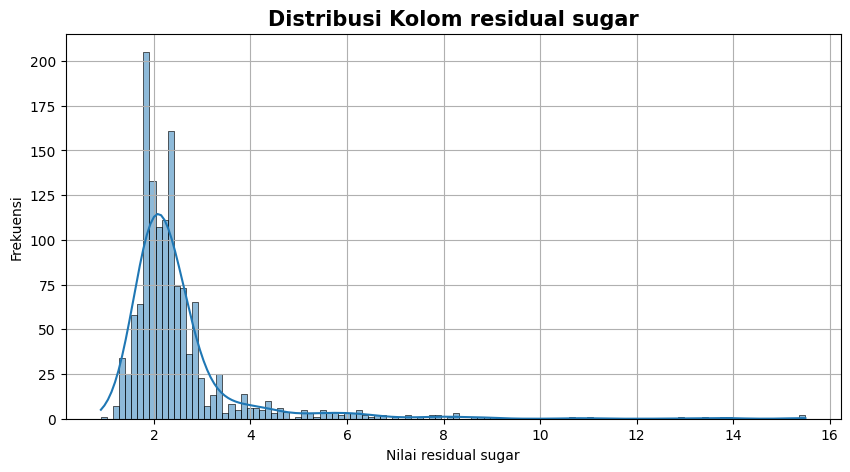

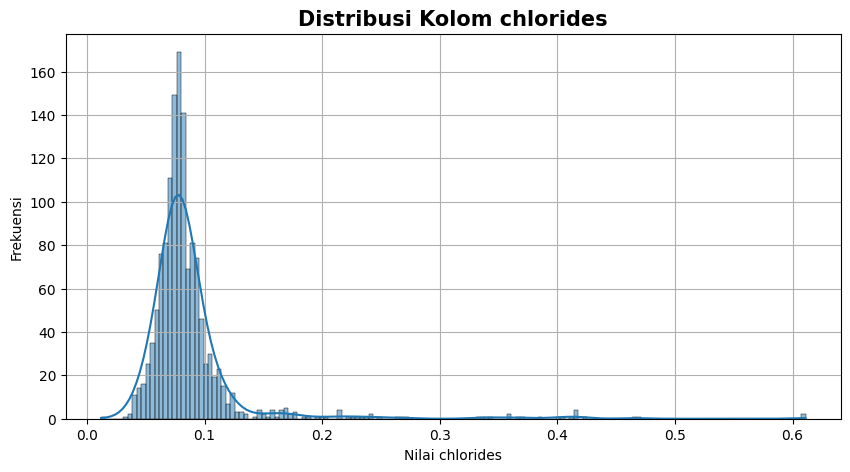

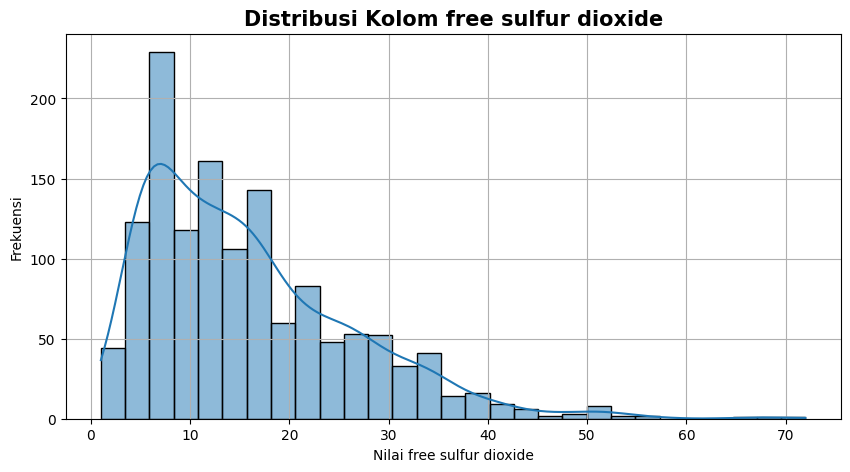

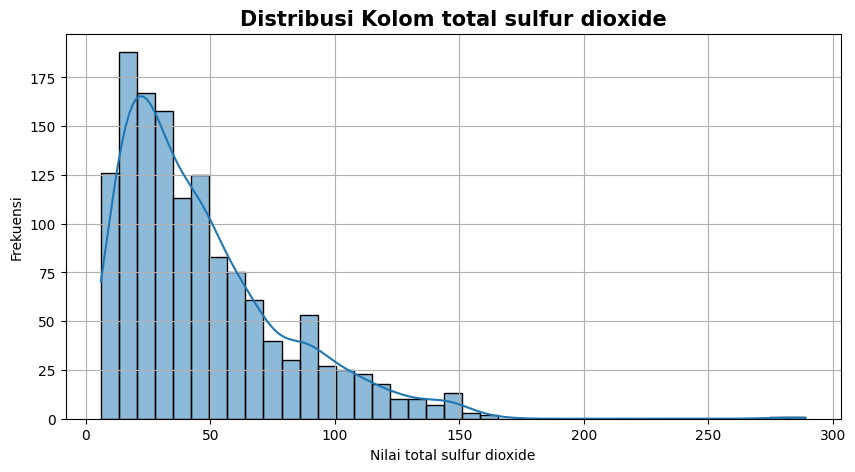

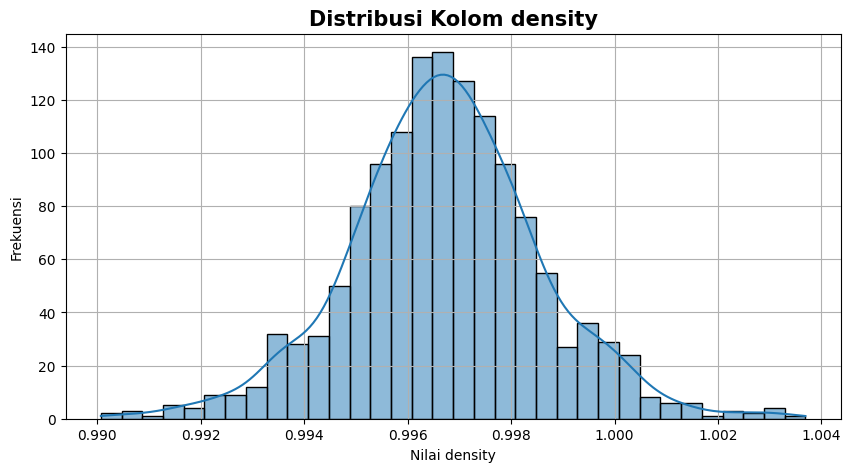

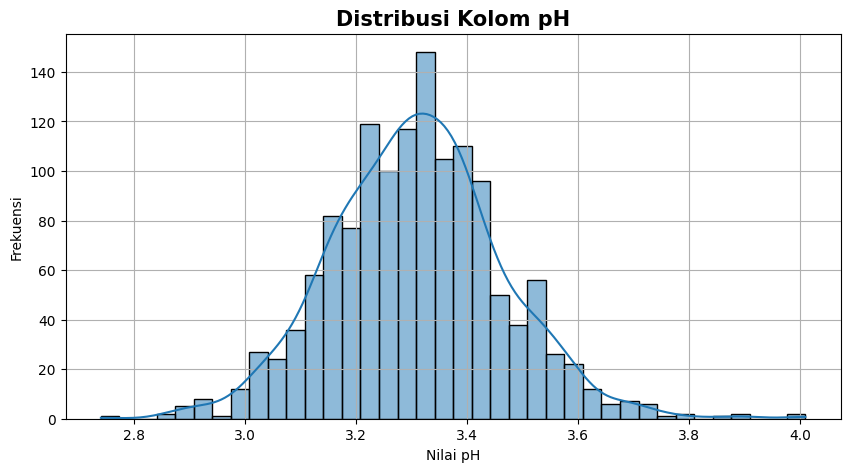

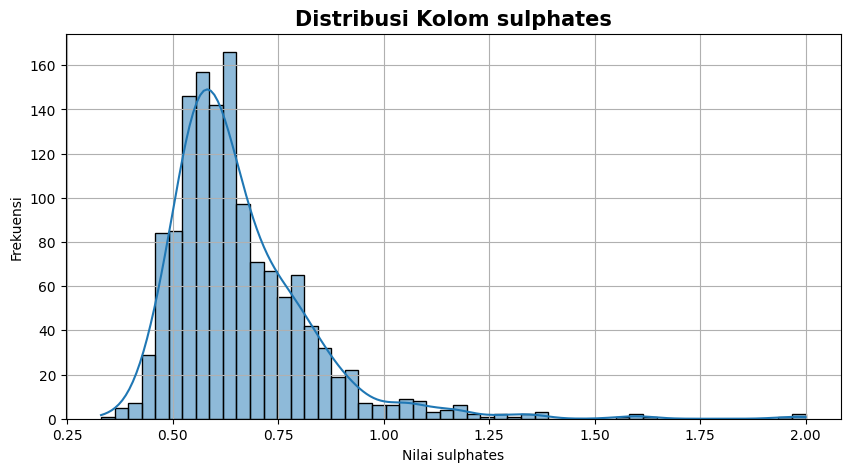

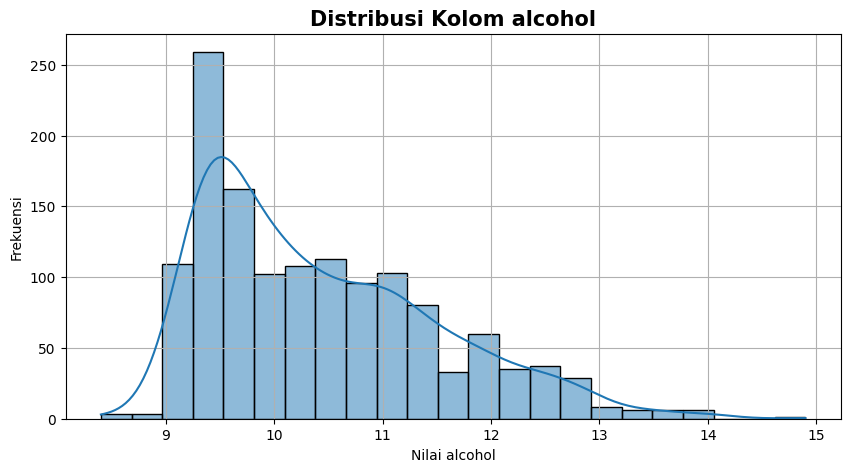

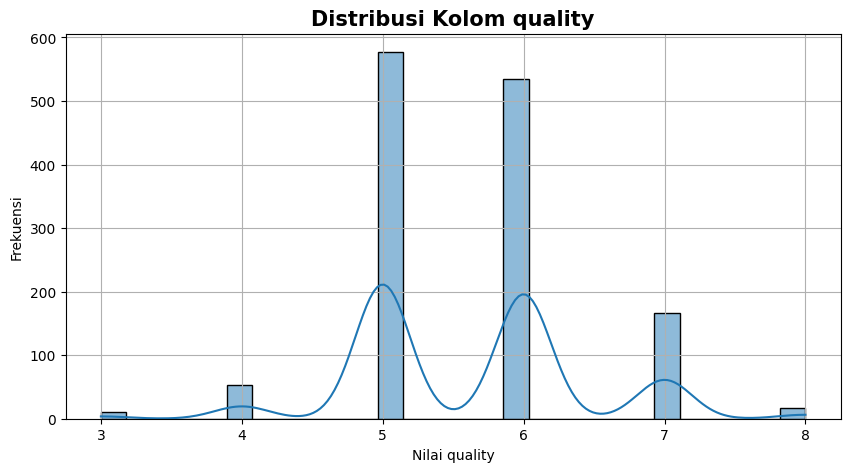

In [7]:
print("\nVisualisasi Distribusi Setiap Fitur:")
for column in df.columns:
  plt.figure(figsize=(10, 5))
  sns.histplot(data=df, x=column, kde=True)
  plt.title(f'Distribusi Kolom {column}', fontweight='bold', fontsize=15)
  plt.xlabel(f'Nilai {column}')
  plt.ylabel(f'Frekuensi')
  plt.grid(True)

### **2.5 Identifikasi Outliers**

Boxplot digunakan untuk melihat sebaran data dan mengidentifikasi adanya outliers (pencilan) pada setiap fitur.


Boxplot untuk Setiap Fitur


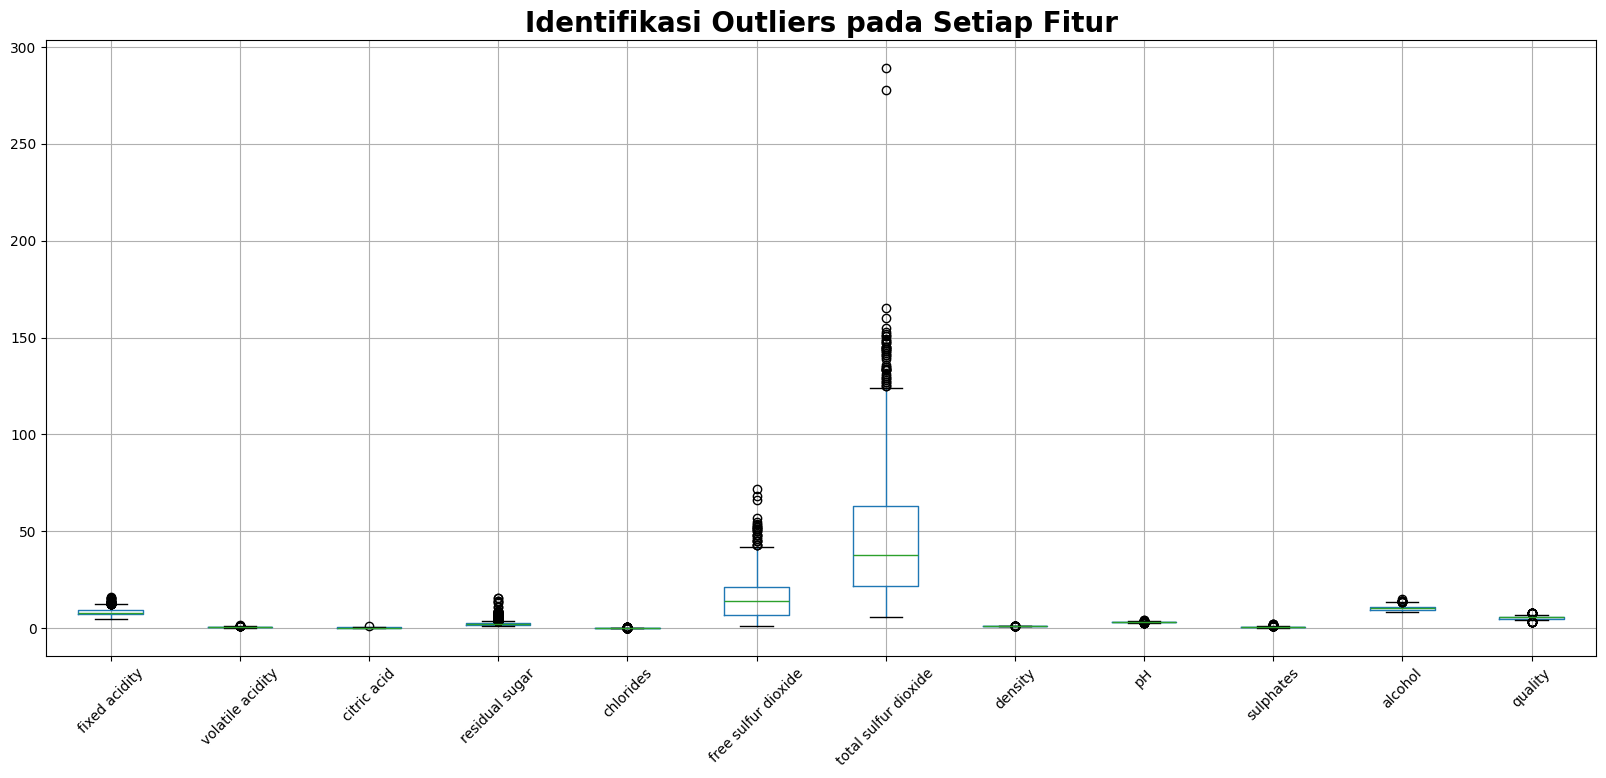

In [10]:
print("\nBoxplot untuk Setiap Fitur")
plt.figure(figsize=(20, 8))
df.boxplot()
plt.title('Identifikasi Outliers pada Setiap Fitur', fontsize=20, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

### **2.6 Analisis Korelasi**

Heatmap korelasi menunjukkan hubungan linear antar variabel. Korelasi yang tinggi antara fitur-fitur independen (multikolinearitas) dapat memengaruhi interpretasi model.

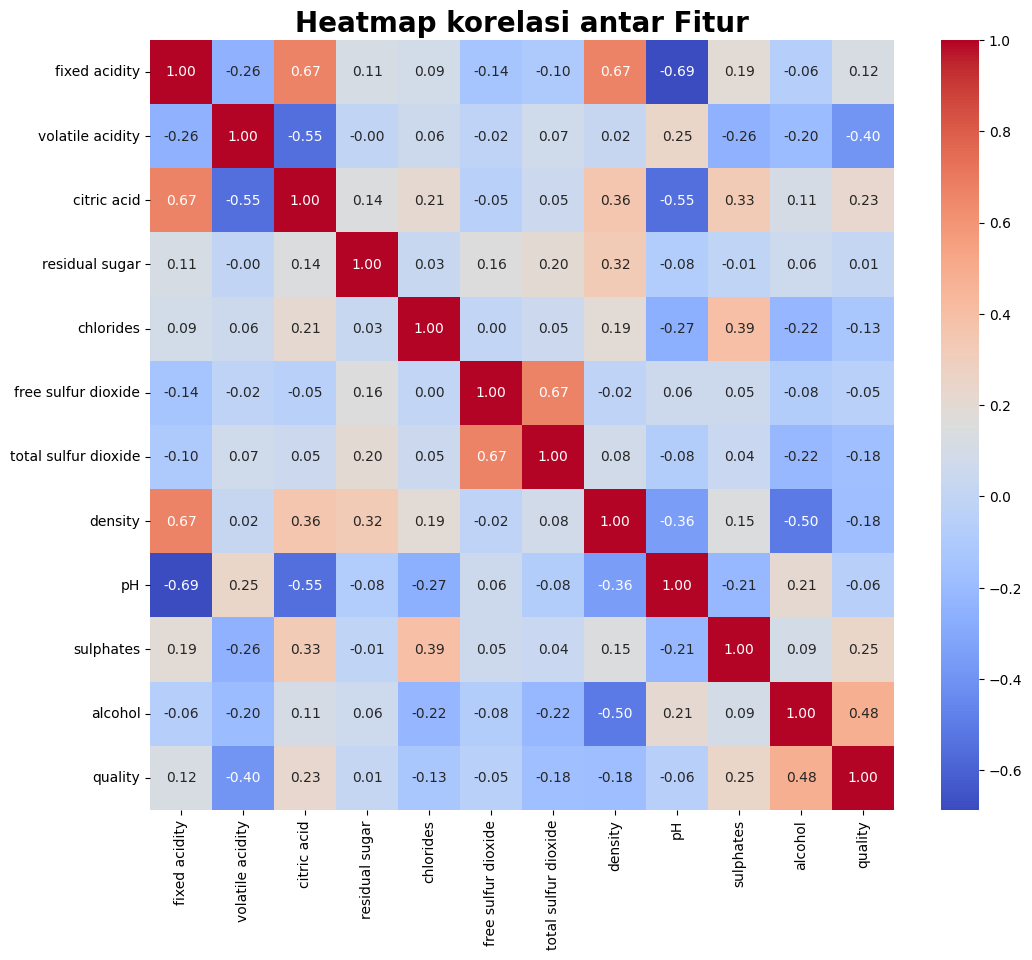

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap korelasi antar Fitur', fontsize=20, fontweight='bold')
plt.show()

## **3. Feature Engineering dan Data Splitting**

Pada bagian ini, kita akan mempersiapkan data untuk pemodelan.

### **3.1 Transformasi Variabel Target**

Sesuai dengan deskripsi dataset, kita akan mengubah masalah ini dari regresi menjadi klasifikasi. Kolom target quality akan diubah menjadi variabel biner:
- **`1` (Baik)**: Jika quality >= 7
- **`0` (Buruk)**: Jika quality < 7

In [13]:
# Mengubah kolom 'quality' menjadi kategori biner (0 = bad, 1 = good)
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

print("Hasil transformasi kolom 'quality':")
df['quality'].head(10)

Hasil transformasi kolom 'quality':


,quality
0,0
1,0
2,0
3,0
5,0
6,0
7,1
8,1
9,0
10,0


### **3.2 Pemeriksaan Keseimbangan Kelas (Class Balance)**

Setelah transformasi, penting untuk memeriksa distribusi kelas pada variabel target. Ketidakseimbangan kelas dapat menyebabkan bias pada model.

Memeriksa distribusi kelas setelah transformasi

In [14]:
df['quality'].value_counts()

,count
quality,
0,1175
1,184


Visualisasi distribusi kelas

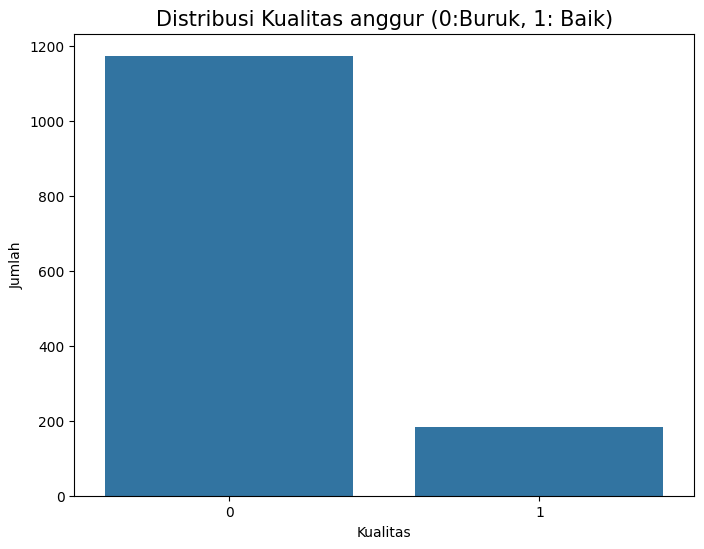

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="quality")
plt.title('Distribusi Kualitas anggur (0:Buruk, 1: Baik)', fontsize=15)
plt.xlabel('Kualitas')
plt.ylabel('Jumlah')
plt.show()

Terlihat jelas bahwa dataset ini tidak seimbang (imbalanced), di mana jumlah anggur berkualitas "buruk" (0) jauh lebih banyak daripada yang "baik" (1). Hal ini perlu diperhatikan saat melatih model.


### **3.3 Pemisahan Data (Train-Test Split)**


Kita akan memisahkan dataset menjadi data fitur (X) dan data target (y), kemudian membaginya menjadi set pelatihan dan set pengujian. Penggunaan stratify=y sangat penting untuk memastikan proporsi kelas pada data latih dan data uji sama dengan proporsi pada data asli, terutama pada kasus dataset tidak seimbang.


In [19]:
# Memisahkan fitur (X) dan target (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Membagi data menjadi 80% data latih dan 20% data uji
# Menggunakan stratify=y untuk menjaga proporsi kelas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Ukuran X_train: {X_train.shape}')
print(f'Ukuran X_test: {X_test.shape}')

Ukuran X_train: (1087, 11)
Ukuran X_test: (272, 11)


In [21]:
# Melihat nilai X dan y
print("Nilai X:")
display(X)

Nilai X:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [22]:
print("Nilai y:")
display(y)

Nilai y:


,quality
0,0
1,0
2,0
3,0
5,0
...,...
1593,0
1594,0
1595,0
1597,0


In [ ]:
# Hyperparameter Tuning
param_dist = {'n_estimators': [10,50,100,200,500],
              'max_depth': [None,1,5,10,15,20]}

# Membuat random forest classifier
model = RandomForestClassifier(class_weight='balanced')

# Menggunakan grid search untuk mencari hyperparameters terbaik
grid_search = GridSearchCV(model,
                           param_dist,
                           cv=5)

# Fit gridsearch object ke the data
grid_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = grid_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  grid_search.best_params_)
print('Best akurasi dari hyperparameter terbaik:',  grid_search.best_score_)

Best hyperparameters: {'max_depth': None, 'n_estimators': 50}
Best akurasi dari hyperparameter terbaik: 0.8822728617934301


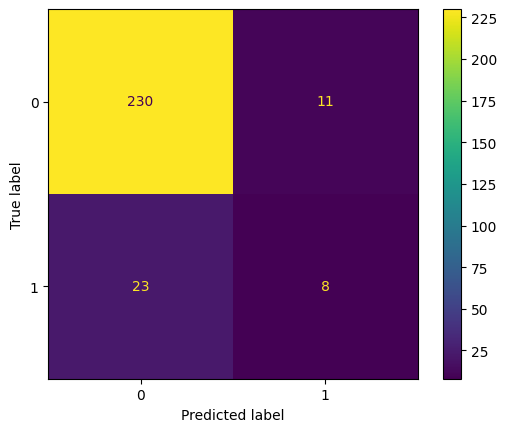

In [ ]:
# Generate prediksi dengan model terbaik
y_pred = best_rf.predict(X_test)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# Mendapatkan akurasi, precision, dan recall
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.875
Precision: 0.42105263157894735
Recall: 0.25806451612903225


In [ ]:
# Mendapatkan classification report
print("Laporan Klasifikasi adalah sebagai berikut: ")
print(classification_report(y_test, y_pred))


Laporan Klasifikasi adalah sebagai berikut: 
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       241
           1       0.42      0.26      0.32        31

    accuracy                           0.88       272
   macro avg       0.67      0.61      0.63       272
weighted avg       0.85      0.88      0.86       272



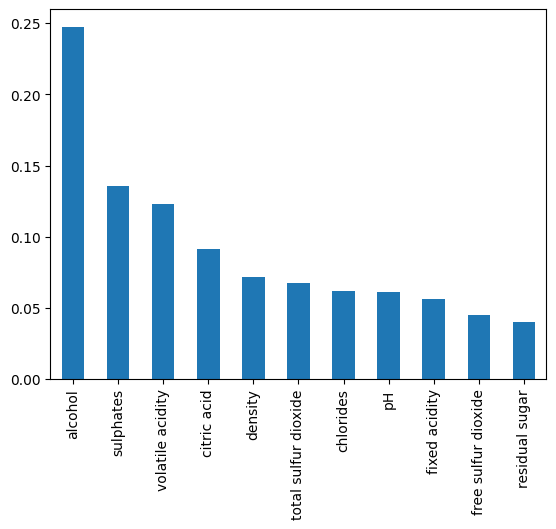

In [ ]:
# Membuat series yang menyimpan feature importance dari model dan feature names dari training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot bar chart
feature_importances.plot.bar();

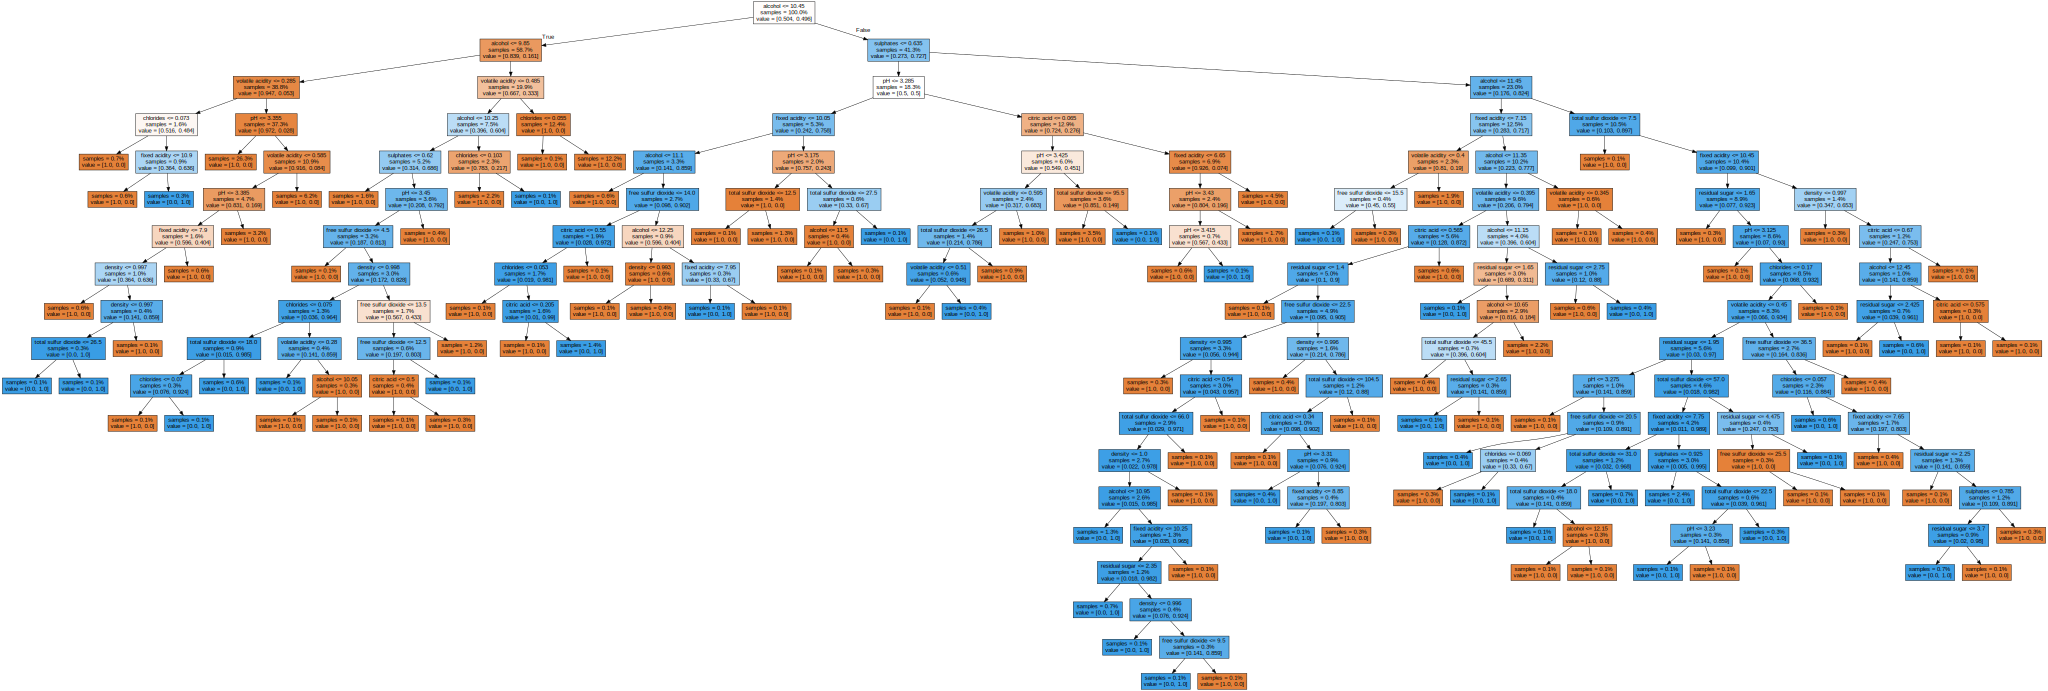

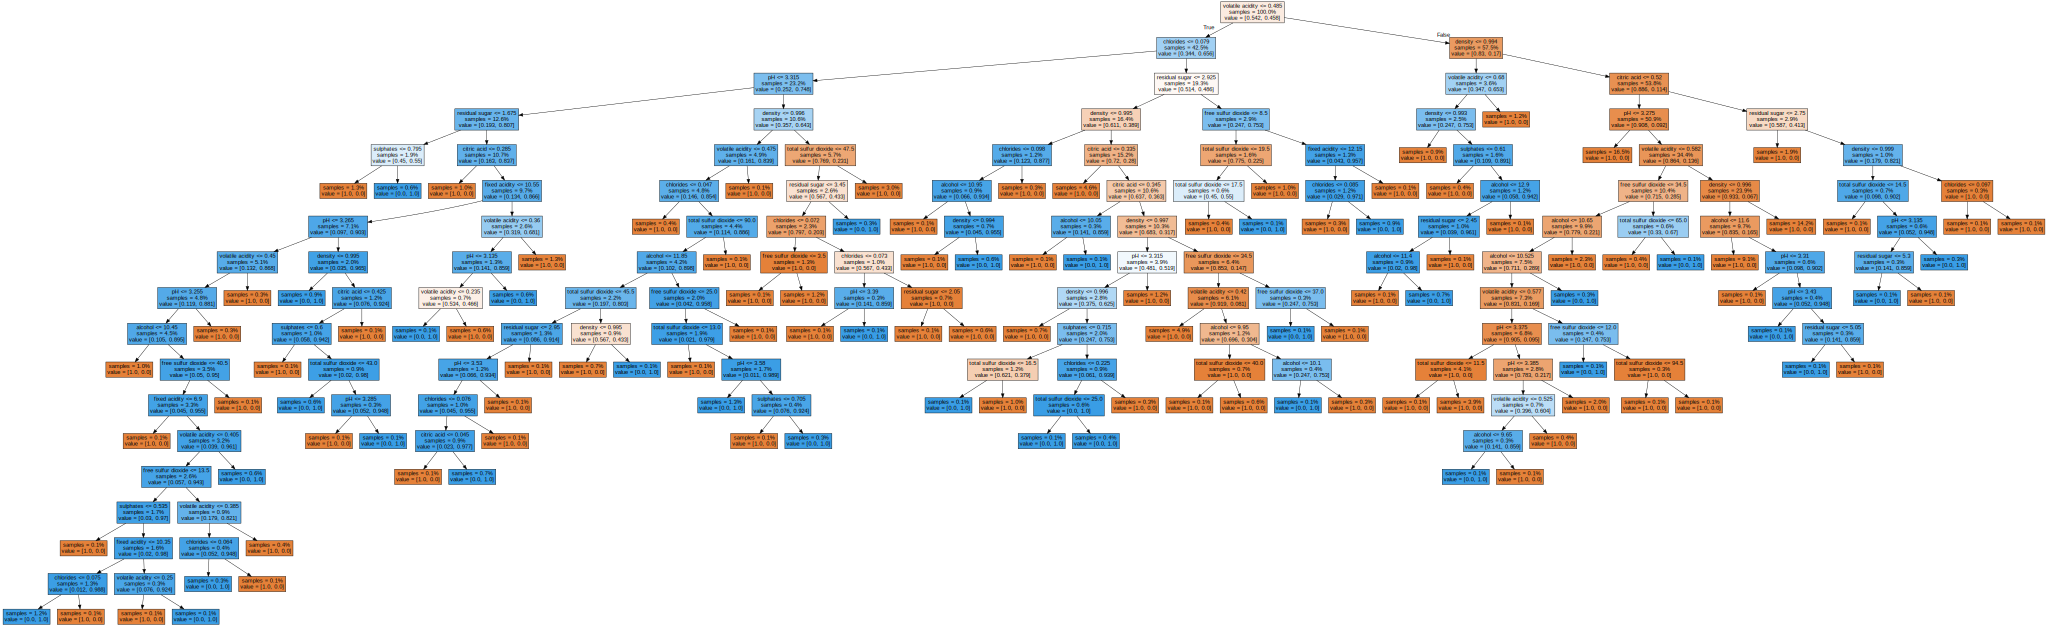

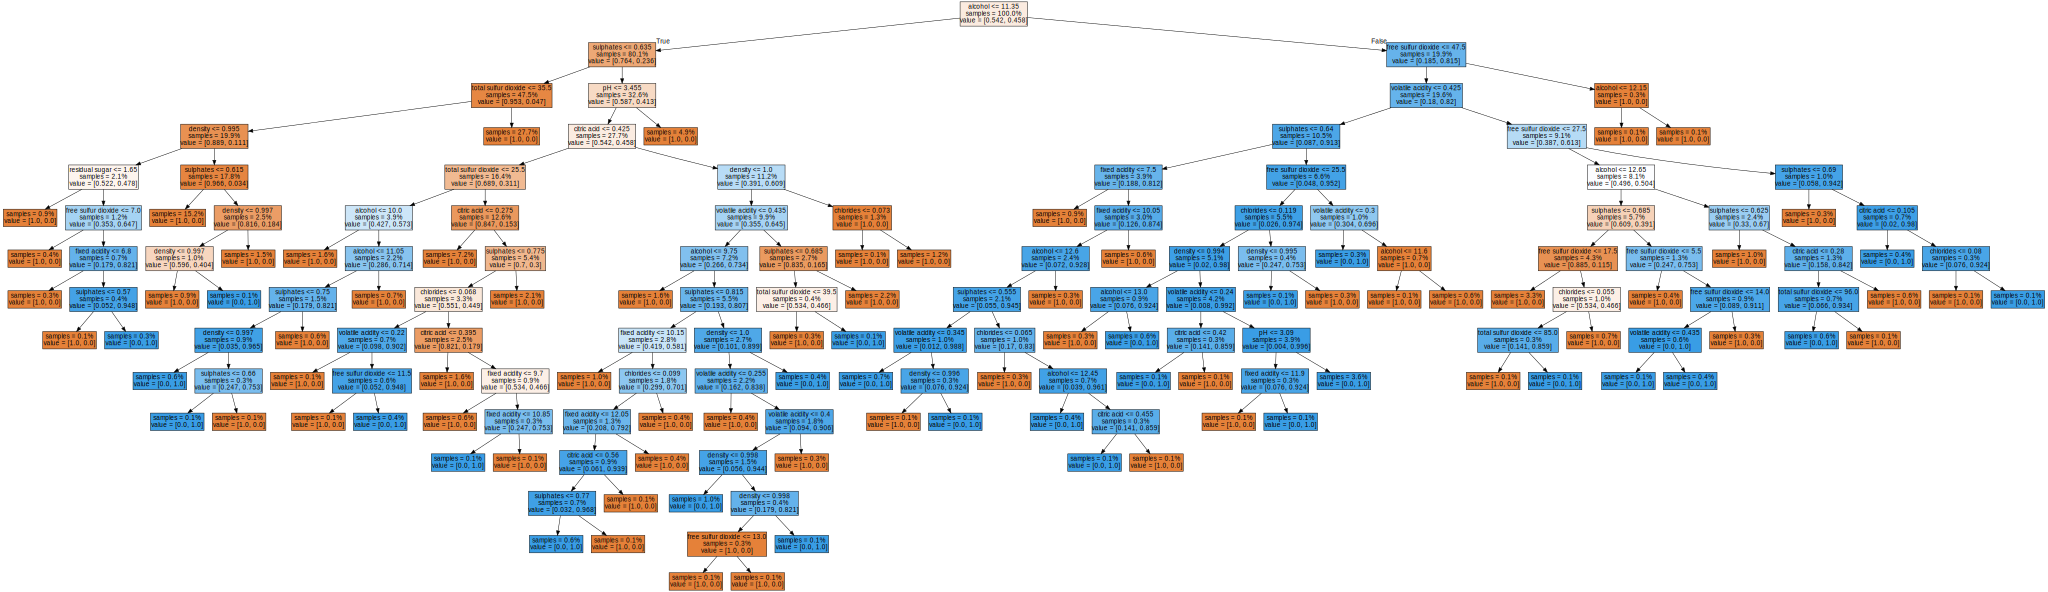

In [ ]:
# Visualisasi hasil dari tree

for i in range(3):
    tree = best_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=20,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
# Hasil dari X_test dataframe yang digabung dengan prediksi dan target column yg asli(quality)
final_df = pd.concat([X_test.reset_index(drop=True),
                     y_test.reset_index(drop=True)], axis=1)
final_df['quality_prediction'] = pd.Series(y_pred)

# Print dataframe X_test dengan y_pred dan quality
print(f"Hasil prediksi dari X_test :")
display(final_df)

Hasil prediksi dari X_test :


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_prediction
0,7.1,0.530,0.07,1.7,0.071,15.0,24.0,0.99510,3.29,0.66,10.8,0,0
1,7.2,0.350,0.26,1.8,0.083,33.0,75.0,0.99680,3.40,0.58,9.5,0,0
2,8.2,0.280,0.40,2.4,0.052,4.0,10.0,0.99356,3.33,0.70,12.8,1,1
3,6.4,0.865,0.03,3.2,0.071,27.0,58.0,0.99500,3.61,0.49,12.7,0,0
4,8.7,0.780,0.51,1.7,0.415,12.0,66.0,0.99623,3.00,1.17,9.2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,6.8,0.670,0.15,1.8,0.118,13.0,20.0,0.99540,3.42,0.67,11.3,0,0
268,7.3,0.835,0.03,2.1,0.092,10.0,19.0,0.99660,3.39,0.47,9.6,0,0
269,7.6,1.580,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,0,0
270,7.6,0.460,0.11,2.6,0.079,12.0,49.0,0.99680,3.21,0.57,10.0,0,0


In [ ]:
# Simulasi prediksi
def simulasi():
  # Dictionary
  dfc = {}

  # Label asli
  label_string = {0:"bad", 1:"good"}

  # Mendapatkan nilai data
  for i in [i for i in df.columns if i != 'quality']:
    dfc[i] = input(f"Masukan {i} : ")
  df_sim = pd.DataFrame([dfc])

  # Prediksi
  X_sim = df_sim
  # y_sim = df_sim['quality']
  prediksi = best_rf.predict(X_sim)

  # Print Hasil
  print(f"\nHasil prediksi adalah : {prediksi[0]} / {label_string[prediksi[0]]}")
  # print(f"Hasil asli adalah : {int(y_sim.item())} / {label_string[int(y_sim.item())]}")

simulasi()

Masukan fixed acidity : 1
Masukan volatile acidity : 0.4
Masukan citric acid : 0.5
Masukan residual sugar : 0.6
Masukan chlorides : 0.2
Masukan free sulfur dioxide : 03.
Masukan total sulfur dioxide : 0.7
Masukan density : 0.3
Masukan pH : 0.5
Masukan sulphates : 0.6
Masukan alcohol : 0.1

Hasil prediksi adalah : 0 / bad
